In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("IDE Data Collection - Sheet1.csv")

In [2]:
df["QType"] = df["Question"].str[:1]
df["QNum"] = df["Question"].str[1:2].astype(str)
df["TestSubjectID"] = df["Test Subject ID"]
df["IDEType"] = df["IDE Type"]
df

,Test Subject ID,Time,Question,IDE Type,TimeSec,LogTime,QType,QNum,TestSubjectID,IDEType
0,V1,3:36.55,C1,IDLE,216.55,2.335558,C,1,V1,IDLE
1,V1,3:34.51,D1,IDLE,214.51,2.331448,D,1,V1,IDLE
2,V1,1:08.18,N1,IDLE,68.18,1.833657,N,1,V1,IDLE
3,V1,1:31.25,C2,PyCharm,91.25,1.960233,C,2,V1,PyCharm
4,V1,1:58.00,D2,PyCharm,118.00,2.071882,D,2,V1,PyCharm
...,...,...,...,...,...,...,...,...,...,...
139,Q1,1:02.01,D2,IDLE,62.01,1.792462,D,2,Q1,IDLE
140,Q1,1:22.43,N2,IDLE,82.43,1.916085,N,2,Q1,IDLE
141,Q1,2:17.42,C3,PyCharm,137.42,2.138050,C,3,Q1,PyCharm
142,Q1,2:55.22,D3,PyCharm,175.22,2.243584,D,3,Q1,PyCharm


In [3]:
from statsmodels.stats.anova import AnovaRM 
res = AnovaRM(data=df[df["QType"] == "C"], depvar='LogTime', subject='TestSubjectID', within=['IDEType']).fit()
print("C", res)
res = AnovaRM(data=df[df["QType"] == "N"], depvar='LogTime', subject='TestSubjectID', within=['IDEType']).fit()
print("N", res)
res = AnovaRM(data=df[df["QType"] == "D"], depvar='LogTime', subject='TestSubjectID', within=['IDEType']).fit()
print("D", res)

C                 Anova
        F Value Num DF  Den DF Pr > F
-------------------------------------
IDEType  0.2885 2.0000 30.0000 0.7515

N                 Anova
        F Value Num DF  Den DF Pr > F
-------------------------------------
IDEType  0.0725 2.0000 30.0000 0.9302

D                 Anova
        F Value Num DF  Den DF Pr > F
-------------------------------------
IDEType  1.3440 2.0000 30.0000 0.2761



In [4]:
res = AnovaRM(data=df[df["QType"] == "C"], depvar='LogTime', subject='TestSubjectID', within=['QNum']).fit()
print("C", res)
res = AnovaRM(data=df[df["QType"] == "N"], depvar='LogTime', subject='TestSubjectID', within=['QNum']).fit()
print("N", res)
res = AnovaRM(data=df[df["QType"] == "D"], depvar='LogTime', subject='TestSubjectID', within=['QNum']).fit()
print("D", res)

C               Anova
     F Value Num DF  Den DF Pr > F
----------------------------------
QNum  0.6300 2.0000 30.0000 0.5395

N               Anova
     F Value Num DF  Den DF Pr > F
----------------------------------
QNum  1.2463 2.0000 30.0000 0.3020

D               Anova
     F Value Num DF  Den DF Pr > F
----------------------------------
QNum  2.5355 2.0000 30.0000 0.0961



In [5]:
groups = df.groupby(["QType", "IDE Type"])["LogTime"].apply(list)
groups

QType  IDE Type
C      IDLE        [2.335558188, 2.804009875, 1.900694774, 2.0097...
       PyCharm     [1.960232873, 2.020071104, 2.597925433, 2.1439...
       VSCode      [2.37386787, 2.363668378, 1.935003151, 2.31470...
D      IDLE        [2.331447543, 2.173623258, 2.1305589, 1.839666...
       PyCharm     [2.071882007, 2.750947867, 1.567379308, 2.2585...
       VSCode      [1.64738297, 2.117768295, 2.158362492, 0.30319...
N      IDLE        [1.833656997, 2.256741793, 2.590440557, 1.4952...
       PyCharm     [1.346548559, 1.905364069, 1.337059726, 2.5909...
       VSCode      [1.064083436, 2.665571611, 1.385069776, 1.0038...
Name: LogTime, dtype: object

# Old Code

In [6]:
# df2 = pd.read_csv("IDE Usage Survey (Responses) - Form Responses 1.csv")
# df2.columns

# scales = [       'On a scale of 1 to 5, rate the usefulness of features for each preferred IDE [VS Code]',
#        'On a scale of 1 to 5, rate the usefulness of features for each preferred IDE [Shell]',
#        'On a scale of 1 to 5, rate the usefulness of features for each preferred IDE [PyCharm]',
#        'On a scale of 1 to 5, rate the intuitiveness for your each IDE [VS Code]',
#        'On a scale of 1 to 5, rate the intuitiveness for your each IDE [Shell]',
#        'On a scale of 1 to 5, rate the intuitiveness for your each IDE [PyCharm]',
#        'On a scale of 1 to 5, how comfortable do you feel using your preferred IDE [VS Code]',
#        'On a scale of 1 to 5, how comfortable do you feel using your preferred IDE [Shell]',
#        'On a scale of 1 to 5, how comfortable do you feel using your preferred IDE [PyCharm]',
#              'On a scale of 1 to 5, what was your level of frustration during your IDE experience?  [VS Code]',
#        'On a scale of 1 to 5, what was your level of frustration during your IDE experience?  [Shell]',
#        'On a scale of 1 to 5, what was your level of frustration during your IDE experience?  [PyCharm]',
#        'On a scale of 1 to 5, rate how inconvenient your IDE experience was?  [VS Code]',
#        'On a scale of 1 to 5, rate how inconvenient your IDE experience was?  [Shell]',
#        'On a scale of 1 to 5, rate how inconvenient your IDE experience was?  [PyCharm]',
#        'On a scale of 1 to 5, rate how time consuming your IDE experience was?  [VS Code]',
#        'On a scale of 1 to 5, rate how time consuming your IDE experience was?  [Shell]',
#        'On a scale of 1 to 5, rate how time consuming your IDE experience was?  [PyCharm]',
#        ]

# for q in scales:
#     df2[q] = df2[q].str[:1].astype(int)

    

In [7]:
tables = []
for qtype in ["C", "D", "N"]:
    d = groups[qtype]
    anova_table = pd.DataFrame({"IDLE": d["IDLE"], "VSCode": d["VSCode"], "PyCharm": d["PyCharm"]})
    tables.append(anova_table)

In [8]:
from scipy.stats import f_oneway, tukey_hsd

atable = tables[0]
for idx, qtype in enumerate(["C", "D", "N"]):
    atable = tables[idx]
    print(qtype, f_oneway(atable["IDLE"], atable["VSCode"], atable["PyCharm"]))

C F_onewayResult(statistic=0.20172537131149243, pvalue=0.818054393765234)
D F_onewayResult(statistic=1.3976473277297938, pvalue=0.25770084018494316)
N F_onewayResult(statistic=0.05849563062806235, pvalue=0.9432539584660509)


In [9]:
# df.groupby([ "QType"])["LogTime"].describe()
df

,Test Subject ID,Time,Question,IDE Type,TimeSec,LogTime,QType,QNum,TestSubjectID,IDEType
0,V1,3:36.55,C1,IDLE,216.55,2.335558,C,1,V1,IDLE
1,V1,3:34.51,D1,IDLE,214.51,2.331448,D,1,V1,IDLE
2,V1,1:08.18,N1,IDLE,68.18,1.833657,N,1,V1,IDLE
3,V1,1:31.25,C2,PyCharm,91.25,1.960233,C,2,V1,PyCharm
4,V1,1:58.00,D2,PyCharm,118.00,2.071882,D,2,V1,PyCharm
...,...,...,...,...,...,...,...,...,...,...
139,Q1,1:02.01,D2,IDLE,62.01,1.792462,D,2,Q1,IDLE
140,Q1,1:22.43,N2,IDLE,82.43,1.916085,N,2,Q1,IDLE
141,Q1,2:17.42,C3,PyCharm,137.42,2.138050,C,3,Q1,PyCharm
142,Q1,2:55.22,D3,PyCharm,175.22,2.243584,D,3,Q1,PyCharm


In [10]:
groups2 = df.groupby(["QType", "QNum"])["LogTime"].apply(list)
tables2 = []
for qnum in ["C", "D", "N"]:
# for qnum in ["1", "2", "3"]:
    d2 = groups2[qnum]
    anova_table2 = pd.DataFrame({"1": d2["1"], "2": d2["2"], "3": d2["3"]})
    # anova_table2 = pd.DataFrame({"C": groups2["C"][qnum], "D": groups2["D"][qnum], "N": groups2["N"][qnum]})
    tables2.append(anova_table2)

In [11]:
groups2

QType  QNum
C      1       [2.335558188, 2.804009875, 1.900694774, 2.0097...
       2       [1.960232873, 2.363668378, 1.935003151, 2.3147...
       3       [2.37386787, 2.020071104, 2.597925433, 2.14391...
D      1       [2.331447543, 2.173623258, 2.1305589, 1.839666...
       2       [2.071882007, 2.117768295, 2.158362492, 0.3031...
       3       [1.64738297, 2.750947867, 1.567379308, 2.25854...
N      1       [1.833656997, 2.256741793, 2.590440557, 1.4952...
       2       [1.346548559, 2.665571611, 1.385069776, 1.0038...
       3       [1.064083436, 1.905364069, 1.337059726, 2.5909...
Name: LogTime, dtype: object

In [12]:
from scipy.stats import f_oneway, tukey_hsd

atable = tables2[0]
for idx, qtype in enumerate(["C", "D", "N"]):
    atable = tables2[idx]
    print(qtype, f_oneway(atable["1"], atable["2"], atable["3"]))

C F_onewayResult(statistic=0.43538993837515, pvalue=0.6497088346306406)
D F_onewayResult(statistic=2.579120977090759, pvalue=0.08701210461106461)
N F_onewayResult(statistic=0.9709596980007847, pvalue=0.3865116457227036)


In [13]:
df.groupby(["QType", "QNum"])["TimeSec"].mean()
df.groupby(["QType", "IDE Type"])["LogTime"].mean()
# df[df["QType"] == "N"].groupby(["QType", "IDE Type"])["LogTime"].hist(alpha=0.5)

QType  IDE Type
C      IDLE        2.220165
       PyCharm     2.172996
       VSCode      2.148015
D      IDLE        1.945491
       PyCharm     2.077610
       VSCode      1.844475
N      IDLE        1.796314
       PyCharm     1.778422
       VSCode      1.829043
Name: LogTime, dtype: float64

<Axes: >

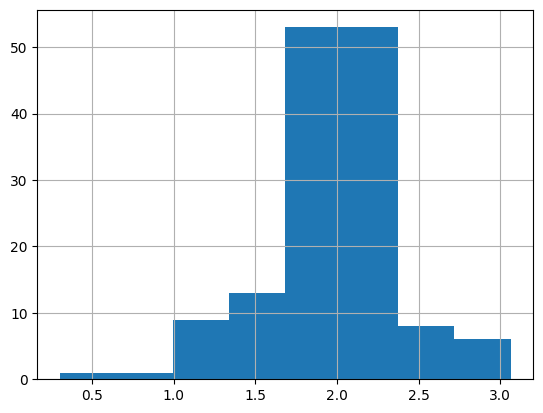

In [14]:
import numpy as np
df["LogTime"].hist(bins=8)
# (np.exp(df["LogTime"]) ** 0.5).hist(bins=8)

<Axes: title={'center': 'LogTime'}, xlabel='IDE Type'>

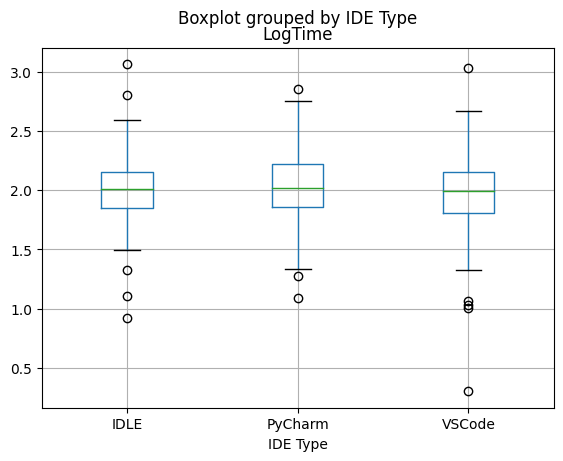

In [15]:
df.boxplot("LogTime", by="IDE Type")

<Axes: title={'center': 'LogTime'}, xlabel='[Mix]'>

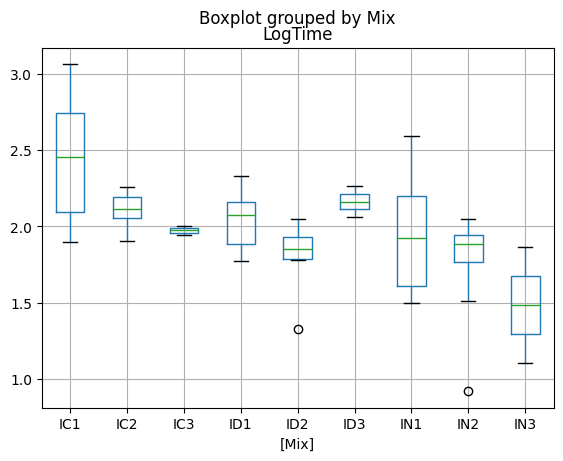

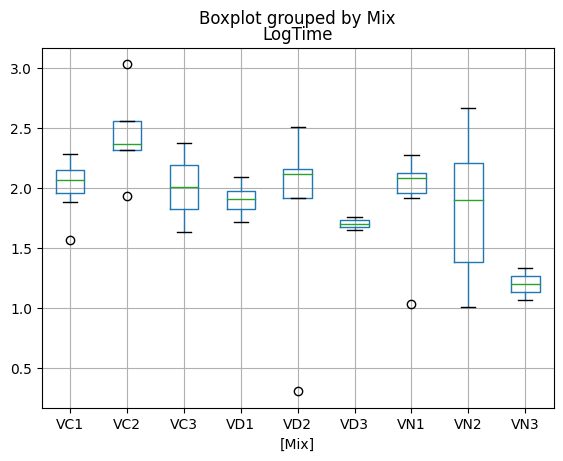

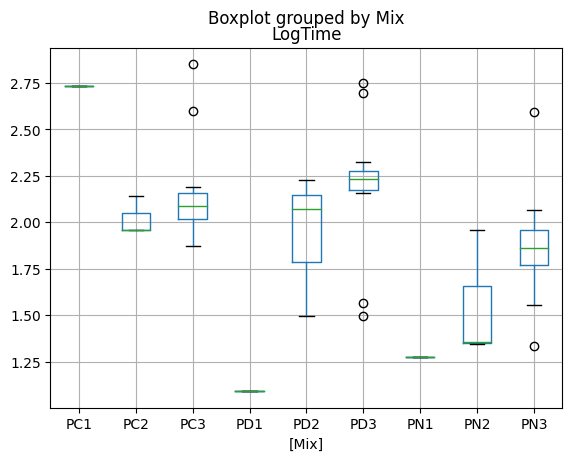

In [16]:
df["Mix"] = df["IDE Type"].str[:1] + df["Question"]
df[df["Mix"].str.startswith("I")].boxplot("LogTime", by=["Mix"])
df[df["Mix"].str.startswith("V")].boxplot("LogTime", by=["Mix"])
df[df["Mix"].str.startswith("P")].boxplot("LogTime", by=["Mix"])
# df.boxplot("LogTime", by=["IDE Type", "QType"])

In [17]:
# df["Mix"] = df["IDE Type"] + " " +  df["Question"] #set(df["IDE Type"].str[:1] + df["Question"])
# df.boxplot("LogTime", by=["Mix2"])

In [18]:
df["Mix2"] = df["IDE Type"].str[:1] + df["Question"].str[:1]
df['Mix2'].value_counts()

Mix2
IC    16
ID    16
IN    16
PC    16
PD    16
PN    16
VC    16
VD    16
VN    16
Name: count, dtype: int64